# Assign guides to cells

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# library = "CRISPR8"
# fastq_path = "/home/vsevim/prj/tf/CATATAC_4/data//atac_and_guidecap"
# tsv_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/CRISPR8/tsv"

In [30]:
stats = []

Count raw reads

In [31]:
n_raw_reads = !zcat {fastq_path}/{library}*R1*.fastq.gz | grep "^@" | wc -l
n_raw_reads = int(n_raw_reads[0])
stats += [['Raw Reads', n_raw_reads]]

Count reads w CS1

In [32]:
n_reads_w_CS1 = !zcat {tsv_path}/{library}*w_CS.TSV.gz | wc -l
n_reads_w_CS1 = int(n_reads_w_CS1[0])
stats += [['Reads with CS1', n_reads_w_CS1]]

In [33]:
stats

[['Raw Reads', 38040359], ['Reads with CS1', 681770]]

### Load the barcode, umi, guide csv

In [37]:
#library = library.upper()
tsv_path = f"{tsv_path}/{library}_ALL_STRUCTURED.TSV"

### Deduplicate 

In [38]:
df_needs_dedup = pd.read_csv(tsv_path, sep="\t")
# I was deduplicating by umi only until analyzing condition 6, 
# but I need to deduplicate by umi+protospacer
df = df_needs_dedup.drop_duplicates(subset=["umi", "protospacer"], keep='first')

In [39]:
df_needs_dedup.head()

,atac_barcode,umi,protospacer,guide,gene,read_name,barcode
0,TTACCGGGTGGATTGA,AGTGTACC,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,NB552361:68:HMGVWBGXK:1:11101:11567:1977,ACATCATCAGGCGATA
1,GCGTAAAGTTCACTTT,CATCTATT,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,NB552361:68:HMGVWBGXK:1:11101:26610:2255,TTGGCTACATTTAAGC
2,AGGGAGTAGTCCCGCA,AACGTACA,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,NB552361:68:HMGVWBGXK:1:11101:2841:2679,ACCAAGTTCACACAGT
3,TTATGTGGTTGTAGCA,CGCAGCAT,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,NB552361:68:HMGVWBGXK:1:11101:24321:2783,NaN
4,CCAGCTAGTGCGGTTC,ATTCATTA,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,NB552361:68:HMGVWBGXK:1:11101:20356:3265,TTTGAGTCAGGAACAT


In [40]:
# Count unique barcodes before protospacer check etc
len(df_needs_dedup.drop_duplicates(subset = "barcode"))

47034

In [41]:
n_reads_w_PS  = len(df_needs_dedup)
n_dedup_reads = len(df)

stats += [['Reads with Protospacer', n_reads_w_PS]]
stats += [['Dedup reads', n_dedup_reads]]


In [42]:
n_uniq_barcodes = len(df['barcode'].unique())
stats += [["Unique barcodes", n_uniq_barcodes]]

### Count UMIs per barcode

In [43]:
barcode_counts = df['barcode'].value_counts()
barcode_counts.head()

GTGCTGATCCAAATCA    60
TGACTCCTCCGGAACC    32
AGGTGAATCGCCTAAG    32
TGTGGCCAGTCATTTC    31
GCGCAATGTTGTTGGA    28
Name: barcode, dtype: int64

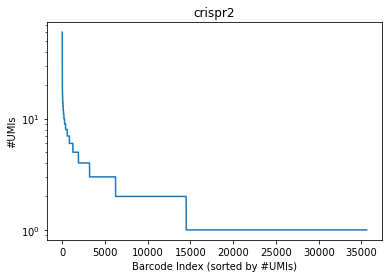

In [44]:
plt.plot(barcode_counts.values)
plt.yscale('log')
plt.xlabel("Barcode Index (sorted by #UMIs)")
plt.ylabel("#UMIs")
plt.title(library)
plt.savefig("plot1.png")
plt.show()

### Count genes per barcode

In [45]:
barcode_counts = df['barcode'].value_counts()
barcode_counts.head()

GTGCTGATCCAAATCA    60
TGACTCCTCCGGAACC    32
AGGTGAATCGCCTAAG    32
TGTGGCCAGTCATTTC    31
GCGCAATGTTGTTGGA    28
Name: barcode, dtype: int64

In [46]:
#------------------------------------------------------------------------------------

In [47]:
df_stats = pd.DataFrame(stats, columns=["Stat", "Count"])
df_stats

,Stat,Count
0,Raw Reads,38040359
1,Reads with CS1,681770
2,Reads with Protospacer,575735
3,Dedup reads,66905
4,Unique barcodes,35602


In [48]:
for i in df_stats.Count:
    print(i)

38040359
681770
575735
66905
35602
